In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = 7,5
from sklearn import datasets

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

In [32]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv("./housing.csv", delim_whitespace=True, names=names)


In [33]:
linear_X, linear_y = datasets.make_regression(n_samples=102,
                                              n_features=14,
                                              noise=75, random_state=42)
linear_X = sm.add_constant(linear_X)

In [34]:
linear_feature_names = ['X'+str(feature+1) for feature in range(linear_X.shape[1])]

In [35]:
linear_X = pd.DataFrame(linear_X)

In [36]:
# Fitting the model
linear_model = sm.OLS(linear_y, linear_X)
linear_model = linear_model.fit()

# Returning the R^2 for the model
print(linear_model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.850    
Dependent Variable: y                AIC:                1198.4400
Date:               2020-11-21 18:44 BIC:                1237.8146
No. Observations:   102              Log-Likelihood:     -584.22  
Df Model:           14               F-statistic:        41.72    
Df Residuals:       87               Prob (F-statistic): 1.68e-32 
R-squared:          0.870            Scale:              6480.0   
--------------------------------------------------------------------
          Coef.    Std.Err.      t      P>|t|     [0.025     0.975] 
--------------------------------------------------------------------
0        15.0596     8.5911    1.7529   0.0831    -2.0160    32.1353
1         7.6911     8.7439    0.8796   0.3815    -9.6884    25.0707
2        14.6040     9.3251    1.5661   0.1210    -3.9306    33.1385
3        85.4579    10.7022    7.9851   0.0000    64.1861   106.7297

In [39]:
predictions = linear_model.predict(linear_X)
df_results = pd.DataFrame({'Actual': linear_y, 'Predicted': predictions})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

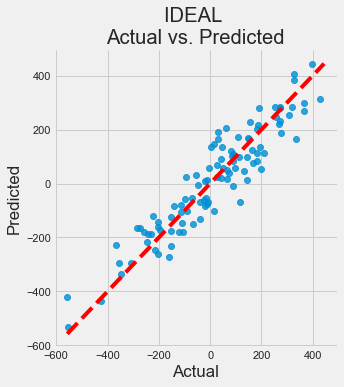

In [40]:
# Plotting the actual vs predicted values
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

# Plotting the diagonal line
coord = np.arange(df_results.min().min(), df_results.max().max())
plt.plot(coord, coord, color='red', linestyle='--')
plt.title('IDEAL \nActual vs. Predicted')
#plt.savefig("Ideal_linear.png")
plt.show()

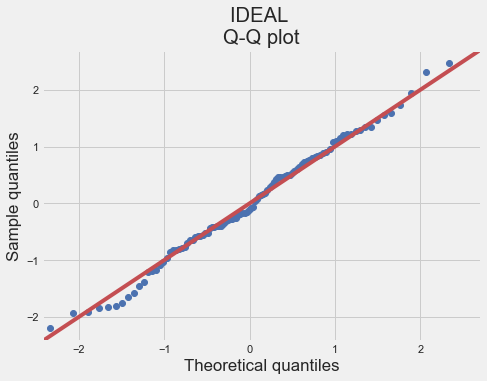

In [41]:
from statsmodels.graphics.gofplots import qqplot

qqplot(linear_model.resid_pearson, line='45', fit='True')
plt.xlabel("Theoretical quantiles")
plt.ylabel("Sample quantiles")
plt.title("IDEAL \nQ-Q plot")
#plt.savefig("Ideal_qq.png")
plt.show()

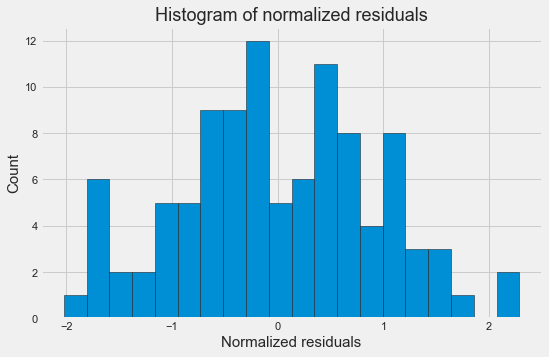

In [42]:
plt.figure()
plt.hist(linear_model.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count')
plt.xlabel('Normalized residuals')
plt.title("Histogram of normalized residuals")
plt.show()

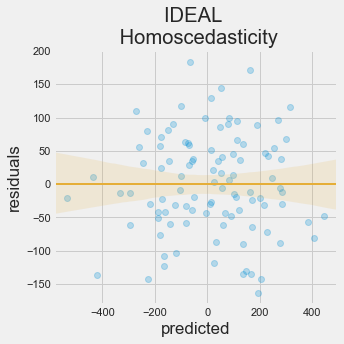

In [43]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(linear_model.fittedvalues, linear_model.resid, scatter_kws={'alpha': 0.25}, line_kws={'color': 'C2', 'lw': 2}, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('residuals')
ax.set_title("IDEAL \n Homoscedasticity")
plt.tight_layout()
plt.show()

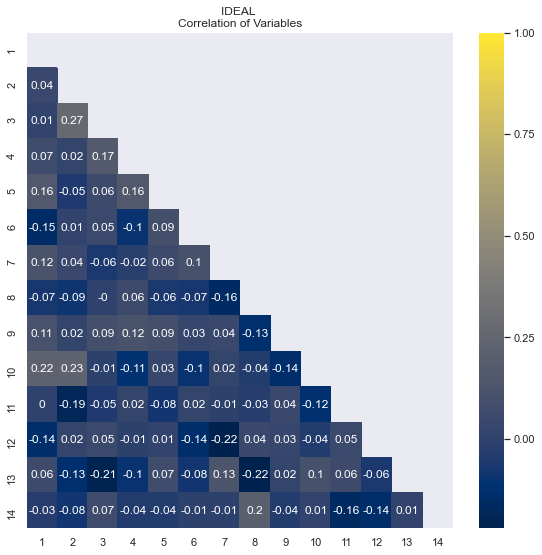

In [44]:
mask = np.zeros_like(linear_X.drop(0, axis=1).corr())
mask[np.triu_indices_from(mask)] = True
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(linear_X.drop(0, axis=1).corr().round(2), annot=True, mask=mask, cmap="cividis")
plt.title("IDEAL \nCorrelation of Variables");

In [45]:
from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(linear_model.resid)
print(durbinWatson)

2.092821891050727


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

for i in range(len(linear_X.columns)):
    v=vif(np.matrix(linear_X),i)
    print("Variance inflation factor for {}: {}".format(linear_X.columns[i],round(v,2)))

Variance inflation factor for 0: 1.16
Variance inflation factor for 1: 1.18
Variance inflation factor for 2: 1.24
Variance inflation factor for 3: 1.18
Variance inflation factor for 4: 1.12
Variance inflation factor for 5: 1.11
Variance inflation factor for 6: 1.13
Variance inflation factor for 7: 1.11
Variance inflation factor for 8: 1.17
Variance inflation factor for 9: 1.09
Variance inflation factor for 10: 1.2
Variance inflation factor for 11: 1.1
Variance inflation factor for 12: 1.13
Variance inflation factor for 13: 1.17
Variance inflation factor for 14: 1.13


C:\Users\ismiguzel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


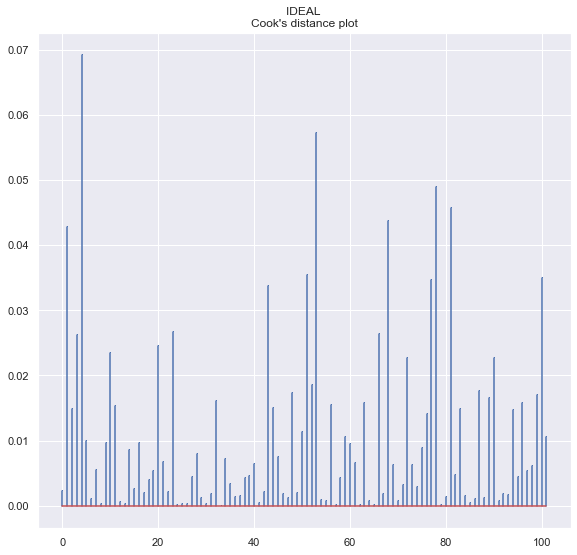

In [47]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence
inf=influence(linear_model)
(i, d) = inf.cooks_distance
plt.title("IDEAL \nCook's distance plot")
plt.stem(np.arange(len(i)), i, markerfmt=",")
plt.show()

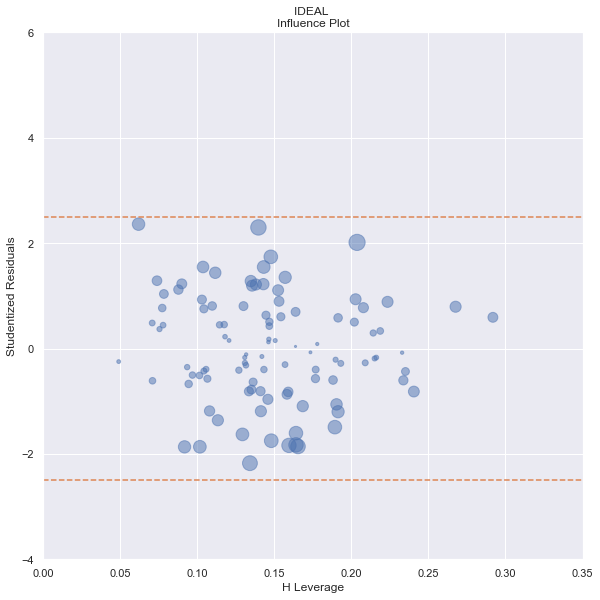

In [48]:
influence = OLSInfluence(linear_model)
fig, ax = plt.subplots()
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal, 
           s=1000 * np.sqrt(influence.cooks_distance[0]), alpha=0.5)
ax.axhline(-2.5, linestyle='--', color='C1')
ax.axhline(2.5, linestyle='--', color='C1')
ax.set_xlabel('H Leverage')
ax.set_ylabel('Studentized Residuals')
ax.set_title("IDEAL \nInfluence Plot")
ax.set_ylim(-4, 6)
ax.set_xlim(0, 0.35)
plt.tight_layout()
plt.show()